This is everyone's favourite TSP algorithm applied to Italian cities, it's probably ok if you're flying, not so much if you're driving as it ignores the existance of any actual geographic feature

A few notes to be made:

- The code used is the same as in the other GA but slightly changed to use latitude and longitude. In particular, I chose NOT to use the plane projection approximation because it's 1) ugly 2) not fitting the fact that we were given spherical coordinates

- The code therefore uses a formula developed by smart people at the Federal Communications Commission and [you can read all about it here](https://en.wikipedia.org/wiki/Geographical_distance#FCC's_formula).

- The formula above takes into account the actual geodetic distance on a sphere even though it's supposed to be used only for distances within 500 km but it's probably fine for Italian cities (by fine I mean the error shouldn't be more than 1% given that its < 0.1% within 500 km)
- The first city in the list could have been any specific one of course, I just took the first that appeared in the prov_ita.txt file which is Agrigento.

In [2]:
def rearrange_cities(file_a, file_b, output_file):
    # Read the city indices from best path
    city_indices = []
    with open(file_b, 'r') as f:
        next(f)  # Skip the first line (header)
        for line in f:
            parts = line.strip().split()
            city_indices.append(int(parts[1]) + 1)  # Adjust index to match line numbers

    # Read the list of cities from prov_ita
    cities = []
    with open(file_a, 'r') as f:
        for line in f:
            cities.append(line.strip())

    # Rearrange cities based on indices from best path
    rearranged_cities = [cities[index - 1] + "\n" for index in city_indices]

    # Write the rearranged cities to the output file
    with open(output_file, 'w') as f:
        f.writelines(rearranged_cities)


rearrange_cities("prov_ita.txt", "Best_path.dat", "City_Order.txt")


You can check the final path in City_Order.txt

/tmp/ipykernel_92223/152336830.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  cities_df = pd.read_csv('Best_path.dat', delim_whitespace=True, comment='#', header=None, names=columns)


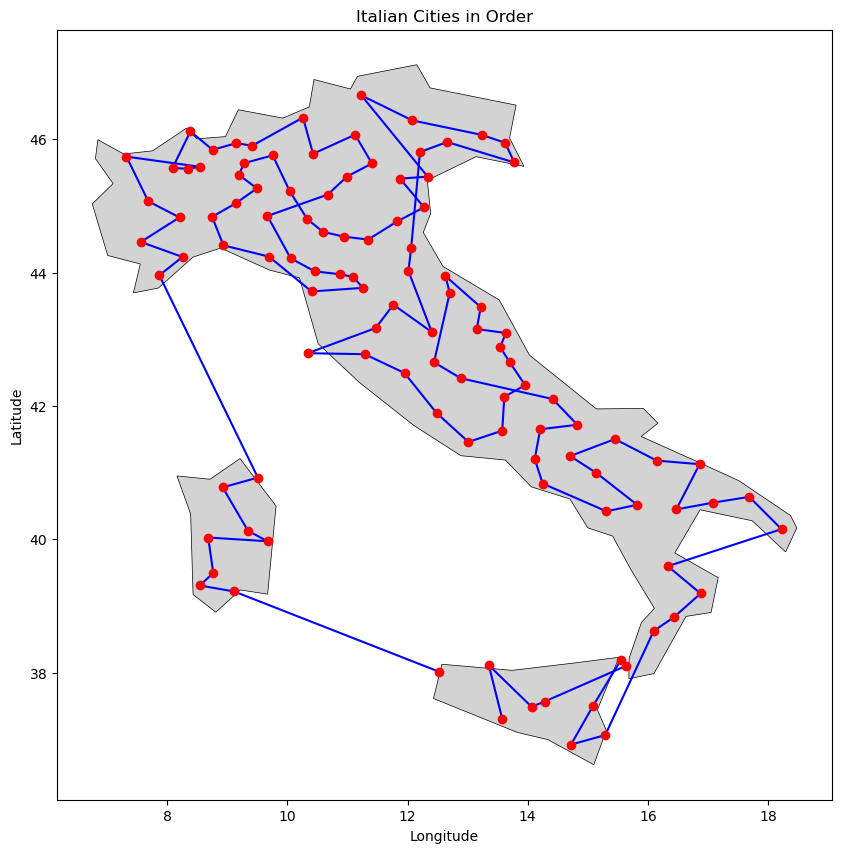

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
from matplotlib.patches import Polygon

# Read the .dat file, skipping the header line
columns = ['position', 'index', 'longitude', 'latitude']
cities_df = pd.read_csv('Best_path.dat', delim_whitespace=True, comment='#', header=None, names=columns)

# Download the basemap of Italy from an online source
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/ITA.geo.json"
response = requests.get(url)
italy_geojson = response.json()

# Create a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the basemap
for feature in italy_geojson['features']:
    geometry = feature['geometry']
    if geometry['type'] == 'Polygon':
        for coords in geometry['coordinates']:
            poly = Polygon(coords, closed=True, edgecolor='black', facecolor='lightgrey', linewidth=0.5)
            ax.add_patch(poly)
    elif geometry['type'] == 'MultiPolygon':
        for polygon in geometry['coordinates']:
            for coords in polygon:
                poly = Polygon(coords, closed=True, edgecolor='black', facecolor='lightgrey', linewidth=0.5)
                ax.add_patch(poly)

# Plot the cities
ax.scatter(cities_df['longitude'], cities_df['latitude'], color='red', zorder=5)

# Plot lines connecting the cities in order
for i in range(len(cities_df) - 1):
    x_coords = [cities_df['longitude'][i], cities_df['longitude'][i+1]]
    y_coords = [cities_df['latitude'][i], cities_df['latitude'][i+1]]
    ax.plot(x_coords, y_coords, color='blue')

# Set plot title and labels
ax.set_title('Italian Cities in Order')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show plot
plt.show()



Total final length: 7277 km or 363 Liters of petrol on a Toyota Corolla ($\approx$ 620 euros)

However since it's mostly a flight path you would need 1146.5 liters of AvGas on a Cessna 172 or roughly 2866 euros